# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gaskell, Mr. Alfred",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


1. PassengerId: unique identifier of the passenger
2. Survived: 1 if yes, 0 if no
3. Pclass: passenger class, 1 through 3
4. Name: passenger name
5. Sex: passenger sex, male or female
6. SibSp: number of siblings/spouses on board
7. Parch: number of parents/children on board
8. Ticket: ticket number
9. Fare: cost of the ticket
10. Cabin: cabin number
11. Embarked: port of embarkment (C = Cherbourg, Q = Queenstown, S = Southampton)

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [6]:
print('Age average:', titanic['Age'].mean())
print('Survivor age average:', titanic.where(titanic['Survived'] == 1)['Age'].mean())
print('Non-surviving first-class age average:', titanic.where((titanic['Survived'] == 0) & (titanic['Pclass'] == 1))['Age'].mean())
print('Male survivors older than 30 not from Queenstown age average:', titanic.where((titanic['Survived'] == 1) & (titanic['Age'] > 30) & (titanic['Embarked'] != 'Q'))['Age'].mean())

Age average: 29.69911764705882
Survivor age average: 28.343689655172415
Non-surviving first-class age average: 43.6953125
Male survivors older than 30 not from Queenstown age average: 41.947154471544714


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [7]:
print(titanic['Age'].mean() - titanic['Age'].median())
print(titanic.where(titanic['Survived'] == 1)['Age'].mean() - titanic.where(titanic['Survived'] == 1)['Age'].median())
print(titanic.where((titanic['Survived'] == 0) & (titanic['Pclass'] == 1))['Age'].mean() - titanic.where((titanic['Survived'] == 0) & (titanic['Pclass'] == 1))['Age'].median())
print(titanic.where((titanic['Survived'] == 1) & (titanic['Age'] > 30) & (titanic['Embarked'] != 'Q'))['Age'].mean() - titanic.where((titanic['Survived'] == 1) & (titanic['Age'] > 30) & (titanic['Embarked'] != 'Q'))['Age'].median())

1.69911764705882
0.34368965517241534
-1.5546875
2.9471544715447138


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [8]:
print('Most common passenger class:', titanic['Pclass'].mode()[0])
print('Most common port of embarkation:', titanic['Embarked'].mode()[0])
print('Most common number of siblings/spouses for survivors:', titanic[titanic['Survived'] == 1]['SibSp'].mode()[0])

Most common passenger class: 3
Most common port of embarkation: S
Most common number of siblings/spouses for survivors: 0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

It's between 0 and 1 standard deviations and below the mean:

In [9]:
print((titanic['Fare'].mean() - titanic['Fare'].median()) / titanic['Fare'].std())
print(titanic['Fare'].mean() > titanic['Fare'].median())

0.3571902456652297
True


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [10]:
perc5 = titanic['Fare'].quantile(0.05)
perc90 = titanic['Fare'].quantile(0.9)

print('5th percentile:', perc5)
print('Class of the 5th percentile:', titanic[titanic['Fare'] == perc5]['Pclass'].unique()[0])
print('90th percentile:', perc90)
print('Class of the 90th percentile:', titanic[titanic['Fare'] == perc90]['Pclass'].unique()[0])

5th percentile: 7.225
Class of the 5th percentile: 3
90th percentile: 77.9583
Class of the 90th percentile: 1


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [11]:
titanic.groupby('Embarked')['Fare'].mean().argmax()

'C'

**What is the most common passenger class for each port?**

In [12]:
for port in titanic['Embarked'].dropna().unique():
    print('Most common class for {}: {}'.format(port, titanic.where(titanic['Embarked'] == port)['Pclass'].mode()[0]))

Most common class for S: 3.0
Most common class for C: 1.0
Most common class for Q: 3.0


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [13]:
titanic.where((titanic['Survived'] == 1) &
              (titanic['Pclass'] == 1) &
              (titanic['Fare'] < 2 * titanic['Fare'].median())
             )['PassengerId'].count() / titanic.where((titanic['Survived'] == 1) &
                                                      (titanic['Pclass'] == 1))['PassengerId'].count()

0.11764705882352941

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [14]:
print('Survivor with family members average age:' ,titanic.where((titanic['Survived'] == 1) & (titanic['SibSp'] + titanic['Parch'] > 0))['Age'].mean())
print('Non-survivor without family members average age:' ,titanic.where((titanic['Survived'] == 0) & (titanic['SibSp'] + titanic['Parch'] == 0))['Age'].mean())

Survivor with family members average age: 25.526062500000002
Non-survivor without family members average age: 32.41423357664234


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

In [15]:
# 20 evenly spaced quantiles
quantiles = titanic['Fare'].quantile(np.linspace(0, 1, 21))
# Add a column with the quantile for each row
titanic['FareQuantile'] = titanic['Fare'].apply(lambda x: quantiles[quantiles <= x].index.values.max())
# Create a new dataset with the data aggregated by quantile
titanic_fareq = titanic.groupby('FareQuantile')['Survived'].apply(lambda x : x.sum() / x.count())

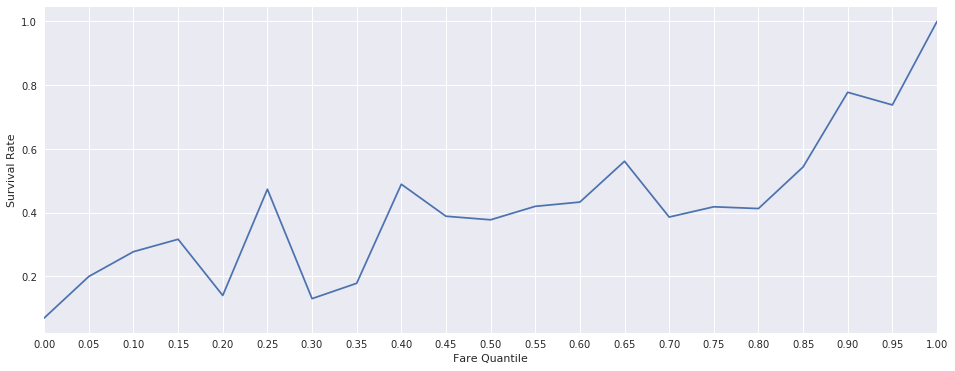

In [16]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(16, 6))
    ax = plt.axes()
    ax.plot(titanic_fareq)
    # Set a locator for each quantile
    ax.xaxis.set_major_locator(plt.FixedLocator(titanic_fareq.index.values))
    # Set x axis limits
    ax.set_xlim(0,1)
    # Add labels
    ax.set_xlabel('Fare Quantile')
    ax.set_ylabel('Survival Rate');

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [17]:
titanic[['Age', 'Fare', 'SibSp', 'Parch']].median()

Age      28.0000
Fare     14.4542
SibSp     0.0000
Parch     0.0000
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

Age and fare because their median is not 0: in the case of siblings/spouses and parents/children the median is 0 and we know that the value of this two attributes can't be negative; so for *at least* half the passengers this values is 0, leaving us with an information not that valuable.

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

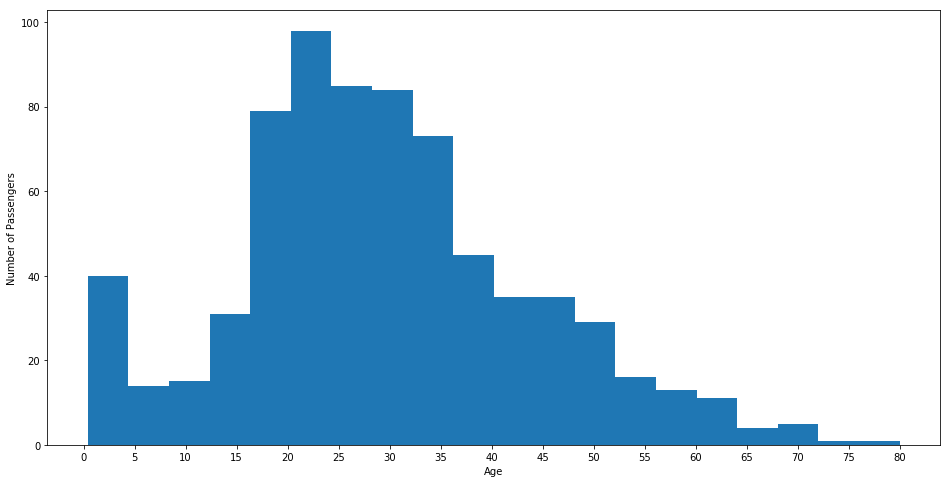

In [18]:
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
# Plot ages using 20 bins
ax.hist(titanic['Age'].dropna(), bins=20)
# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')
# Set locators
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [19]:
print('Survival probability:', titanic['Survived'].sum() / len(titanic))
print('Male probability:', titanic[titanic['Sex'] == 'male']['PassengerId'].count() / len(titanic))
print('Female and at least one sibling/spouse probability:', titanic[(titanic['Sex'] == 'female') & (titanic['SibSp'] > 0)]['PassengerId'].count() / len(titanic))
print('Survivor from Cherbourg probability:', titanic[titanic['Embarked'] == 'C']['PassengerId'].count() / len(titanic))
print('Less than 10 years old probability:', titanic[titanic['Age'] < 10]['PassengerId'].count() / len(titanic))
print('Between 25 and 40 years old probability:', titanic[(titanic['Age'] >= 25) & (titanic['Age'] <= 40)]['PassengerId'].count() / len(titanic))
print('Less than 20 or more than 50 years old probability:', titanic[(titanic['Age'] < 20) | (titanic['Age'] > 50)]['PassengerId'].count() / len(titanic))

Survival probability: 0.3838383838383838
Male probability: 0.64758698092
Female and at least one sibling/spouse probability: 0.157126823793
Survivor from Cherbourg probability: 0.188552188552
Less than 10 years old probability: 0.0695847362514
Between 25 and 40 years old probability: 0.320987654321
Less than 20 or more than 50 years old probability: 0.255892255892


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [20]:
survival_rate = titanic['Survived'].sum() / len(titanic)
stats.binom.pmf(42, 100, survival_rate)

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [21]:
1 - stats.binom.cdf(42, 100, survival_rate)

0.19807683025744727

**Take random samples of 100 passengers and find out how many you need before the fraction of those samples where at least 42 passengers survive matches the probability you calculated previously (within Δp≈0.05).**

Answers will vary based on chosen seeds. What would happen if you drew every sample with the same seed?

Plot the survival fraction vs the number of random samples.

In [22]:
# Set the seed (if I used the same seed for every sample I would always get the same result,
# so the fraction of samples would always be the same, namely 0 or 1 depending on the sample)
random.seed(42)

# Set the target probability from above and Δp
target_prob = 0.1980
delta = 0.0005

# Initialize list of fraction of samples with at least 42 survivors
# and counters for number of samples drawn and number of samples with at least 42 passengers
survival_frac = []
n_samples = 0
n_over = 0

# Iterate until the fraction of samples is within delta
while True:
    # Take a new sample
    n_samples += 1
    samp = random.sample(set(np.arange(len(titanic))), 100)
    # Check if survivors >= 42 and add to n_over
    if titanic.iloc[samp, 1].sum() >= 42:
        n_over += 1
    # Calculate the fraction of samples
    survival_frac.append(n_over / n_samples)
    if abs(n_over / n_samples - target_prob) < delta:
        break

In [23]:
print('Number of samples needed:', len(survival_frac))

Number of samples needed: 86


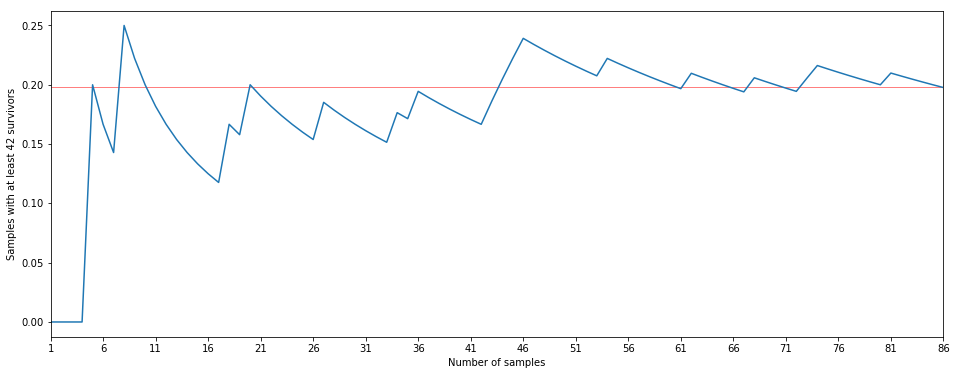

In [24]:
fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.plot(survival_frac)
# Set labels
ax.set_xlabel('Number of samples')
ax.set_ylabel('Samples with at least 42 survivors')
# Set x axis limits, locators and formatters
ax.set_xlim(0, len(survival_frac) - 1)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, pos: int(value + 1)))
# Add a reference line for the target probability
ax.hlines(0.1980, 0, len(survival_frac) - 1, colors='red', linewidth=.5);

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**Use a 95% confidence level.**

The difference between the ages of male and female survivors is not statitically relevant (the p-value is 0.4):

In [25]:
print('Male survivors age average:', titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Age'].mean())
print('Female survivors age average:', titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['Age'].mean())

# print(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Age'].std())
# print(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['Age'].std())

stats.ttest_ind(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Age'].dropna(),
                titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['Age'].dropna())

Male survivors age average: 27.276021505376345
Female survivors age average: 28.84771573604061


Ttest_indResult(statistic=-0.83511701251268022, pvalue=0.40434406202206297)

The difference between the fares paid by passengers from Queenstown and Cherbourg is statistically significant (the p-value is less than 0.001):

In [26]:
print('Fares paid by passengers embarked in Queenstown average:', titanic[titanic['Embarked'] == 'Q']['Fare'].mean())
print('Fares paid by passengers embarked in Cherbourg average:', titanic[titanic['Embarked'] == 'C']['Fare'].mean())

# print(titanic[titanic['Embarked'] == 'Q']['Fare'].std())
# print(titanic[titanic['Embarked'] == 'C']['Fare'].std())

stats.ttest_ind(titanic[titanic['Embarked'] == 'Q']['Fare'].dropna(),
                titanic[titanic['Embarked'] == 'C']['Fare'].dropna())

Fares paid by passengers embarked in Queenstown average: 13.276029870129872
Fares paid by passengers embarked in Cherbourg average: 59.95414404761905


Ttest_indResult(statistic=-4.8443893129870306, pvalue=2.2635880995498548e-06)

**Accompany your p-values with histograms showing the distributions of both compared populations.**

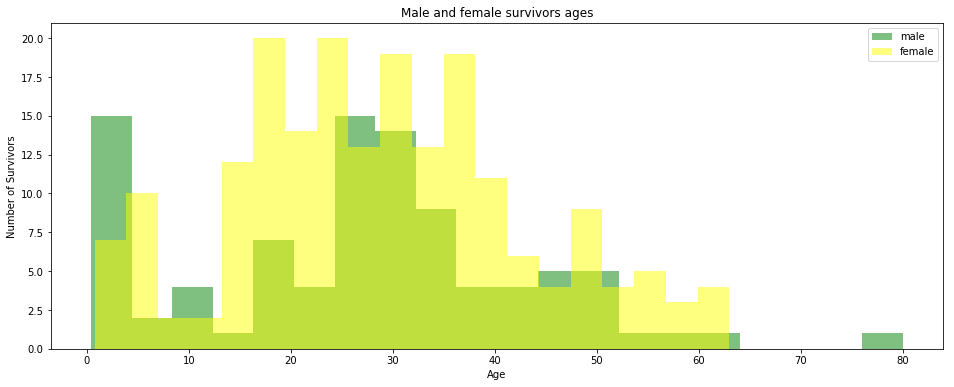

In [27]:
fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
# Plot the distribution of ages for the two groups with 20 bins
ax.hist(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]['Age'].dropna(), bins=20, color='green', alpha=.5, label='male')
ax.hist(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]['Age'].dropna(), bins=20, color='yellow', alpha=.5, label='female')
# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Number of Survivors')
ax.set_title('Male and female survivors ages')
# Add legend
ax.legend();

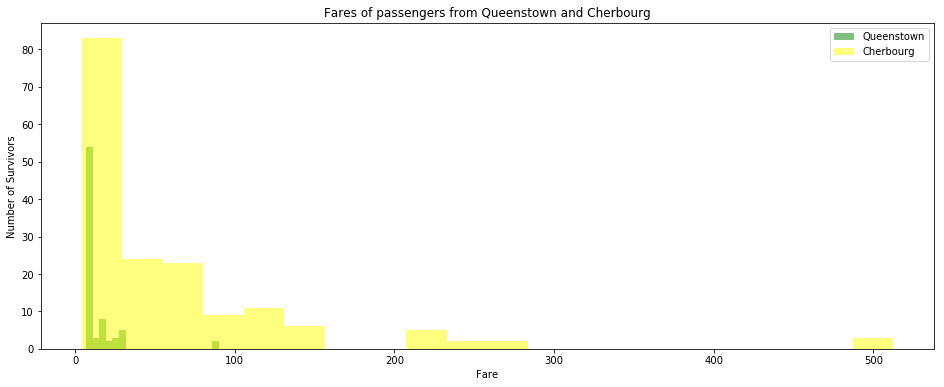

In [28]:
fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
# Plot the distribution of fares for the two groups with 20 bins
ax.hist(titanic[titanic['Embarked'] == 'Q']['Fare'].dropna(), bins=20, color='green', alpha=.5, label='Queenstown')
ax.hist(titanic[titanic['Embarked'] == 'C']['Fare'].dropna(), bins=20, color='yellow', alpha=.5, label='Cherbourg')
# Add labels and title
ax.set_xlabel('Fare')
ax.set_ylabel('Number of Survivors')
ax.set_title('Fares of passengers from Queenstown and Cherbourg')
# Add legend
ax.legend();

**Did survivors pay more for their tickets than those that did not? Use a 95% confidence level.**

The difference between the fares paid by survivors and non-survivors is statistically significant (the p-value is less than 0.001):

In [29]:
print('Survivors average fare:', titanic[titanic['Survived'] == 1]['Fare'].mean())
print('Non-survivors average fare:', titanic[titanic['Survived'] == 0]['Fare'].mean())

# print(titanic[titanic['Survived'] == 1]['Fare'].std())
# print(titanic[titanic['Survived'] == 0]['Fare'].std())

stats.ttest_ind(titanic[titanic['Survived'] == 1]['Fare'].dropna(),
                titanic[titanic['Survived'] == 0]['Fare'].dropna())

Survivors average fare: 48.39540760233917
Non-survivors average fare: 22.117886885245877


Ttest_indResult(statistic=7.9391916608710549, pvalue=6.1201893419241981e-15)

**Did a given first-class passenger have fewer family members on board than a given third-class passenger? Use a 95% confidence level.**

The difference between the number of family member on board for first class passengers and third class passengers is not statitically relevant (the p-value is 0.09):

In [30]:
print('First class average number of family members:', (titanic[titanic['Pclass'] == 1]['Parch'] + titanic[titanic['Pclass'] == 1]['SibSp']).mean())
print('Third class average number of family members:', (titanic[titanic['Pclass'] == 3]['Parch'] + titanic[titanic['Pclass'] == 3]['SibSp']).mean())

# print((titanic[titanic['Pclass'] == 1]['Parch'] + titanic[titanic['Pclass'] == 1]['SibSp']).std())
# print((titanic[titanic['Pclass'] == 3]['Parch'] + titanic[titanic['Pclass'] == 3]['SibSp']).std())

stats.ttest_ind((titanic[titanic['Pclass'] == 1]['Parch'] + titanic[titanic['Pclass'] == 1]['SibSp']).dropna(),
                (titanic[titanic['Pclass'] == 3]['Parch'] + titanic[titanic['Pclass'] == 3]['SibSp']).dropna())

First class average number of family members: 0.7731481481481481
Third class average number of family members: 1.0081466395112015


Ttest_indResult(statistic=-1.6669267466046978, pvalue=0.095973115331851724)